# 1. Import Dependencies and Data

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [1]:
# !pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

In [2]:
# Bringing in tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
# Brining in tensorflow datasets for fashion mnist 
import tensorflow_datasets as tfds
# Bringing in matplotlib for viz stuff
from matplotlib import pyplot as plt

In [4]:
ds = tfds.load('fashion_mnist', split='train')

In [5]:
type(ds)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [6]:
ds.as_numpy_iterator().next()['label']

2

# 2. Viz Data and Build Dataset

In [7]:
import numpy as np

In [8]:
data_iterator = ds.as_numpy_iterator()

In [9]:
data_iterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

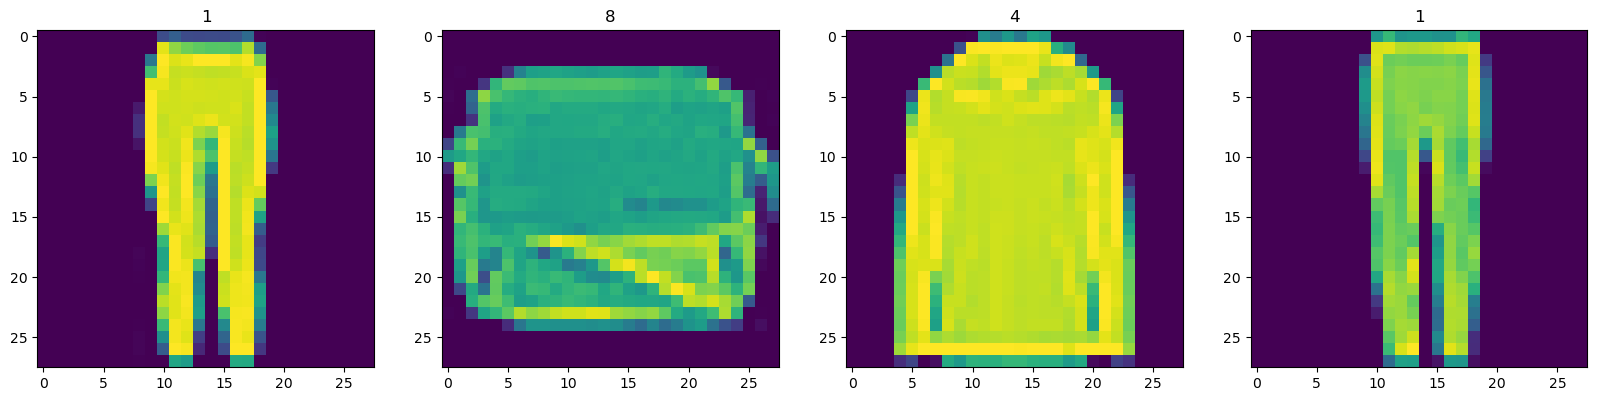

In [10]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20, 20))
for idx in range(4):
    sample = data_iterator.next()
    ax[idx].imshow(np.squeeze(sample['image']))
    ax[idx].title.set_text(sample['label'])

In [11]:
def scale_images(data):
    image = data['image']
    return image / 255

MCHSBAP - Map, Cache, Shuffle, Batch, Prefetch

In [12]:
# Reload the dataset 
ds = tfds.load('fashion_mnist', split='train')
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images) 
# Cache the dataset for that batch 
ds = ds.cache()
# Shuffle it up 
ds = ds.shuffle(60000)
# Batch into 128 images per sample
ds = ds.batch(128)
# Reduces the likelihood of bottlenecking 
ds = ds.prefetch(64)

In [13]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# 3. Build Neural Network

### 3.1 Import Modelling Components

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [15]:
def build_generator():
    model = Sequential()
    
    # Takes in random value and reshapes into 7x7x128. Beginning of Generated Image
    # 128 values is passing in a batch. We give width and height 7 x 7
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7, 7, 128)))
    
    # Upsampling block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Upsampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convlutional Sampling block 1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Conv Layer to get t0 one channel
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))
    
    return model

In [16]:
generator = build_generator()

In [17]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [18]:
img = generator.predict(np.random.randn(4, 128, 1))
img

1/1 [==============================] - 1s 649ms/step


array([[[[0.5033517 ],
         [0.4950313 ],
         [0.49935895],
         ...,
         [0.50996464],
         [0.50401294],
         [0.5037443 ]],

        [[0.50126654],
         [0.49226364],
         [0.48813424],
         ...,
         [0.49787906],
         [0.49533942],
         [0.4997675 ]],

        [[0.5027855 ],
         [0.49210605],
         [0.4916648 ],
         ...,
         [0.49284235],
         [0.49436128],
         [0.5008777 ]],

        ...,

        [[0.49370536],
         [0.49787173],
         [0.49707925],
         ...,
         [0.4987942 ],
         [0.4984672 ],
         [0.5013907 ]],

        [[0.49800697],
         [0.49946606],
         [0.50188535],
         ...,
         [0.50326025],
         [0.4992647 ],
         [0.5021344 ]],

        [[0.49538624],
         [0.4981056 ],
         [0.5008924 ],
         ...,
         [0.50123215],
         [0.49986348],
         [0.50051093]]],


       [[[0.49950242],
         [0.50038373],
         [0.50

In [19]:
img.shape

(4, 28, 28, 1)

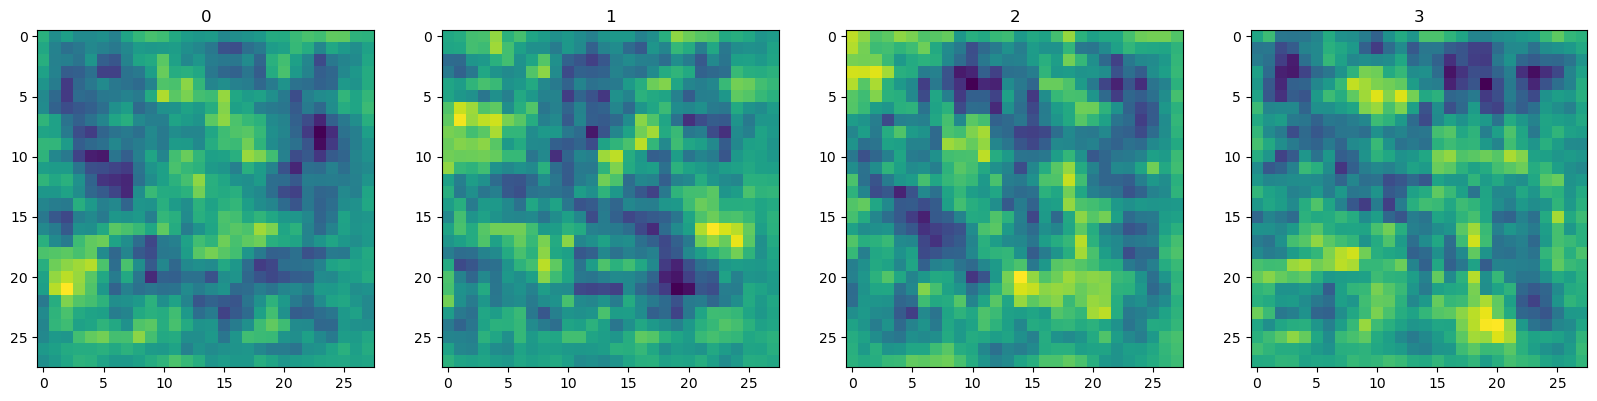

In [20]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20, 20))
for idx, img in enumerate(img):
    sample = data_iterator.next()
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

### 3.3 Build Discriminator

In [21]:
def build_discriminator(): 
    model = Sequential()
    
    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model 

In [22]:
discriminator = build_discriminator()

In [23]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [24]:
img = generator.predict(np.random.randn(4, 128, 1))

1/1 [==============================] - 0s 93ms/step


In [25]:
img = img[0]

In [26]:
img.shape

(28, 28, 1)

In [27]:
discriminator.predict(np.expand_dims(img, 0))

1/1 [==============================] - 0s 134ms/step


array([[0.50330305]], dtype=float32)

In [28]:
img = generator.predict(np.random.randn(4, 128, 1))
discriminator.predict(img)

1/1 [==============================] - 0s 52ms/step


array([[0.503289 ],
       [0.5035465],
       [0.5034861],
       [0.503471 ]], dtype=float32)

# 4. Construct Training Loop

### 4.1 Setup Losses and Optimizers

In [29]:
# Adam (Optimizer) and BinaryCrossentropy (Loss) for Both Generative and Discriminator.
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [30]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

### 4.2 Build Subclassed Model

In [31]:
from tensorflow.keras.models import Model

In [32]:
tf.random.normal((6, 128, 1))

<tf.Tensor: shape=(6, 128, 1), dtype=float32, numpy=
array([[[-1.42704129e-01],
        [ 9.42311704e-01],
        [-8.97853315e-01],
        [-1.75213385e+00],
        [-7.41928339e-01],
        [-4.38921541e-01],
        [-4.63459730e-01],
        [ 1.51156855e+00],
        [ 4.30280894e-01],
        [ 1.24816263e+00],
        [ 1.77583650e-01],
        [-3.76846910e-01],
        [-1.13779211e+00],
        [-1.46912587e+00],
        [-2.81600332e+00],
        [ 4.08255547e-01],
        [-9.51764524e-01],
        [-6.32459939e-01],
        [-9.67609048e-01],
        [ 2.19543934e+00],
        [ 2.58104134e+00],
        [-2.33229011e-01],
        [ 7.59796321e-01],
        [ 3.58277410e-01],
        [ 8.94813538e-01],
        [-7.27687120e-01],
        [ 1.89003512e-01],
        [ 1.53677270e-01],
        [-8.22316527e-01],
        [ 1.07234132e+00],
        [ 3.50318402e-01],
        [ 8.42982888e-01],
        [ 2.87227988e-01],
        [-6.90865338e-01],
        [ 1.13593364e+00],
  

In [34]:
tf.random.normal((6, 128))

<tf.Tensor: shape=(6, 128), dtype=float32, numpy=
array([[-0.01064804,  0.38097063, -1.2775762 , -0.15258701,  0.644081  ,
        -1.5266725 ,  0.8929488 , -0.5857613 ,  0.02075235,  0.32658994,
        -0.54321814, -1.0736768 , -0.47284344,  0.12248844,  0.5105417 ,
         0.756461  , -1.4333173 , -0.02726371, -0.4797067 ,  0.2826544 ,
        -1.1896628 , -0.11092144,  0.93645465, -0.44744018, -0.19716541,
         0.8319378 ,  0.40348414,  1.5799109 , -0.3851585 ,  0.8071932 ,
        -0.08480813,  1.0811373 , -2.881613  , -0.3372611 ,  0.13235334,
         0.11185099, -0.6296776 , -1.4593086 ,  1.3836089 ,  0.5026752 ,
         0.38029727, -0.6488837 , -0.39010817, -0.36312693, -1.5562532 ,
        -0.5566848 ,  0.5368049 ,  1.4793596 , -1.2020112 ,  1.7036767 ,
         0.49072835,  1.0304499 ,  0.27683854, -0.02825665, -0.25173676,
         0.7473209 , -0.66038084, -1.2134362 ,  0.40409446,  1.765036  ,
        -0.01127822, -0.12911372, -0.74074644, -0.42835933,  2.1086388 ,
 

In [35]:
tf.ones_like(tf.random.normal((6, 128)))

<tf.Tensor: shape=(6, 128), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1

In [39]:
tf.concat([tf.zeros_like(tf.random.normal((6, 128))), tf.ones_like(tf.random.normal((6, 128)))], 
          axis=0)

<tf.Tensor: shape=(12, 128), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)>

In [74]:
class FashionGAN(Model):

    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator
    
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss   
        
    def train_step(self, batch):
        # Get batch
        real_images = batch
        fake_images = self.generator(tf.random.normal((6, 128, 1)), training=False)
        
        # Train Discriminator
        with tf.GradientTape() as d_tape:
            # Pass Real and Fake images to discriminator model.
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for Fake and Real Images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake = tf.concat([noise_real, noise_fake], axis=0)

            # Calculate the loss
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - NN Learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128, 128, 1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)
        
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss": total_d_loss, "g_loss": total_g_loss}

In [75]:
# Create instance of subclassed model
fashgan = FashionGAN(generator, discriminator)

In [76]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

### 4.3 Build Callback

In [77]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [81]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))
            # img.save(os.path.join('/content/gdrive/MyDrive/Fashion_GAN/images', f'generated_img_{epoch}_{i}.png'))

### 4.3 Train 

In [82]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [83]:
# Recommend 2000 epochs
hist = fashgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

In [ ]:
hist.history

In [87]:
model_history =     {
                        'd_loss': [0.2400606870651245, 
                                   0.23066967725753784, 
                                   0.20874661207199097, 
                                   0.20684552192687988, 
                                   0.23760800063610077, 
                                   0.21231842041015625, 
                                   0.2133299559354782, 
                                   0.16744649410247803, 
                                   0.1881769597530365, 
                                   0.19765247404575348, 
                                   0.13878467679023743, 
                                   0.18008452653884888, 
                                   0.20728491246700287, 
                                   0.16677628457546234, 
                                   0.18383467197418213, 
                                   0.20790481567382812, 
                                   0.18914274871349335, 
                                   0.21707116067409515, 
                                   0.15993164479732513, 
                                   0.19451916217803955], 
                        'g_loss': [0.08582714945077896, 
                                   0.033212073147296906, 
                                   0.007800314575433731, 
                                   2.645075073814951e-05, 
                                   1.9083854496670938e-08, 
                                   5.5060809245333076e-09, 
                                   1.3773644447212519e-09, 
                                   5.423105298163478e-10, 
                                   3.834428607962792e-10, 
                                   4.5056688935396494e-10, 
                                   6.312481648507173e-10, 
                                   3.53243490014421e-10, 
                                   2.736250948043306e-10, 
                                   3.3327718362841097e-10, 
                                   3.143763582791337e-10, 
                                   7.312089267408339e-10, 
                                   5.551713533336056e-10, 
                                   6.189914136811581e-10, 
                                   2.8259933282370753e-10, 
                                   7.675979851740067e-10]
                    }

In [89]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

![graph](images/hist_graph.png)

# 5. Test Out the Generator

### 5.1 Generate Images

In [108]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))
img

1/1 [==============================] - 0s 73ms/step


array([[[[0.50632775],
         [0.50268966],
         [0.50067973],
         ...,
         [0.5009888 ],
         [0.502204  ],
         [0.5034408 ]],

        [[0.49620605],
         [0.49846563],
         [0.4989356 ],
         ...,
         [0.49352807],
         [0.49834535],
         [0.5024916 ]],

        [[0.4928368 ],
         [0.49440897],
         [0.49489114],
         ...,
         [0.49751192],
         [0.50154746],
         [0.5057361 ]],

        ...,

        [[0.4991762 ],
         [0.49678776],
         [0.49913985],
         ...,
         [0.49758047],
         [0.50182587],
         [0.501055  ]],

        [[0.50135773],
         [0.5000938 ],
         [0.50364643],
         ...,
         [0.49595937],
         [0.5014007 ],
         [0.5026399 ]],

        [[0.4980152 ],
         [0.49891353],
         [0.50286555],
         ...,
         [0.49594626],
         [0.49829873],
         [0.5008292 ]]],


       [[[0.49865922],
         [0.5011162 ],
         [0.50

In [109]:
# imgs.shape
# (16, 28, 28, 1)

# img[0].shape
# (28, 28, 1)

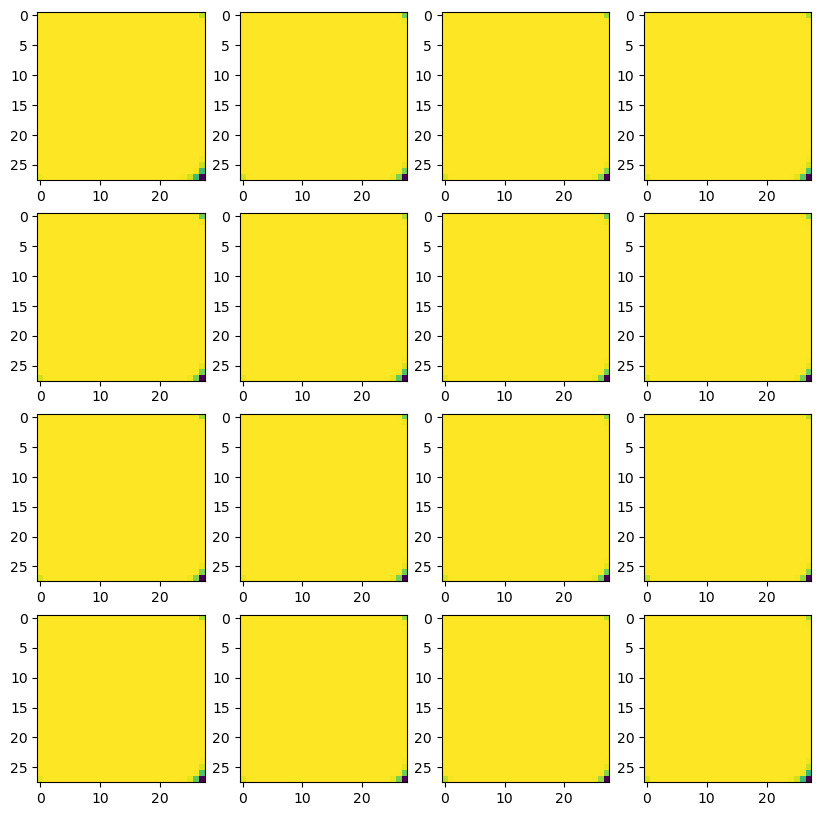

In [110]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(np.squeeze(imgs[(r+1)*(c+1)-1]))

### 5.2 Save the Model

In [112]:
# generator.save('/content/gdrive/MyDrive/Fashion_GAN/generator.h5')
# discriminator.save('/content/gdrive/MyDrive/Fashion_GAN/discriminator.h5')
generator.save('generator.h5')
discriminator.save('discriminator.h5')

This looks like not working. Because we have only trained for 20 epochs. Try somewhere near 2000 epochs.

In [103]:
# generator.load_weights('/content/gdrive/MyDrive/Fashion_GAN/generatormodel.h5')
generator.load_weights(os.path.join('generatormodel.h5'))

In [113]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))
imgs.shape

1/1 [==============================] - 0s 84ms/step


(16, 28, 28, 1)

In [118]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(np.squeeze(imgs[(r+1)*(c+1)-1]))

![picture](images/16picture.png)